## Initialize session

In [26]:
%pylab
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 3 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
star_age = ms.star_log(mass=3,Z=0.02)
star = mp.se(mass=3,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


## Find the Red Giant Branch and Thermal Pulses

<IPython.core.display.Javascript object>


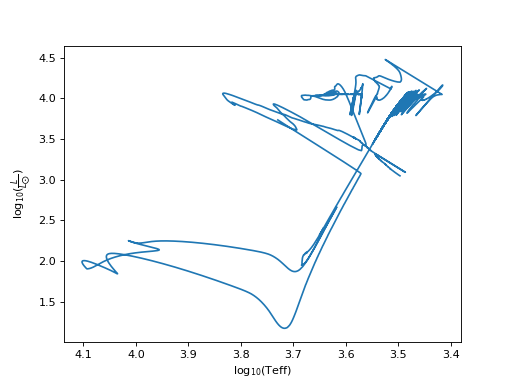

In [27]:
figure(1)
temp_surface = star_age.get('log_Teff')
luminosity = star_age.get('log_L')
plot(temp_surface[0:143000],luminosity[0:143000])
gca().invert_xaxis()
xlabel('log$_{10}$(Teff)')
ylabel(r"log$_{10}(\frac{L}{L_{\bigodot}})$")

<IPython.core.display.Javascript object>


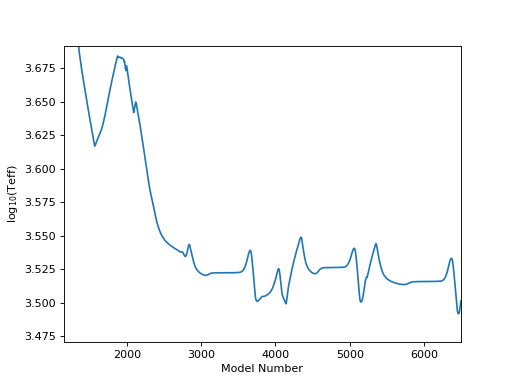

In [28]:
figure(2)
model = star_age.get('model_number')
plot(model,temp_surface)
xlabel('Model Number')
ylabel(r"log$_{10}$(Teff)")

#### First Thermal Pulse

* Just before the red giant (model # 2770)
* Minimum in surface temperature of thermal pulse "middle of pulse" (model # 3754)
* Maximum in surface temperature of thermal pulse "end of pulse" (model # 4350)

## Abundance Profiles

<IPython.core.display.Javascript object>


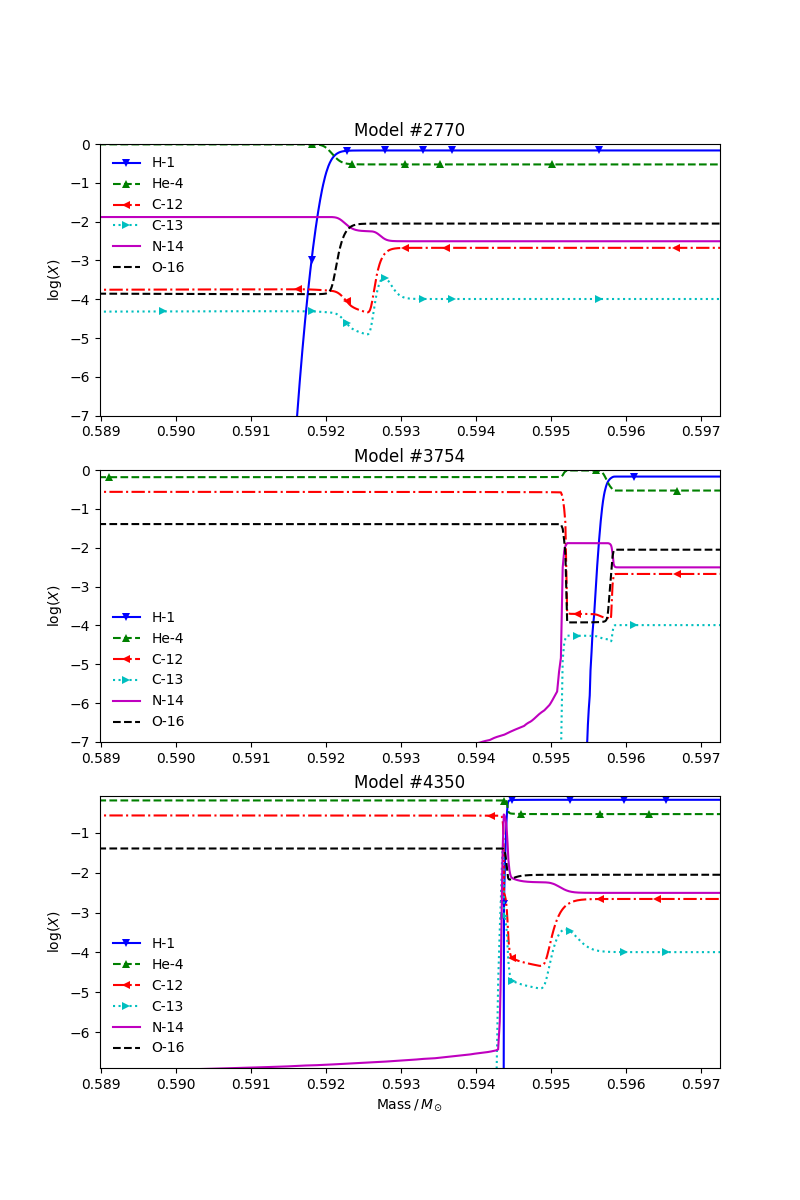

 reading ['iso_massf']...100%

In [22]:
# model numbers
before_pulse = 2770
middle_pulse = 3754
end_pulse = 4350

# species to look at
species=['H-1','He-4','C-12','C-13','N-14','O-16']

# create a plot of abundance profiles
fig = figure(10)
fig.set_size_inches(8,12)

# plot the first abundance profile
ax1 = fig.add_subplot(311)
star.abu_profile(isos=species, fname=before_pulse, logy=True)
ax1.set_ylim(-7,0)
ax1.set_xlim(0.56,0.6)
ax1.set_xlabel('')
ax1.set_title('Model #' + str(before_pulse))

ax2 = subplot(312, sharex=ax1)
star.abu_profile(isos=species, fname=middle_pulse, logy=True)
ax2.set_ylim(-7,0)
ax2.set_xlim(0.56,0.6)
ax2.set_xlabel('')
ax2.set_title('Model #' + str(middle_pulse))

ax3 = subplot(313, sharex=ax1)
star.abu_profile(isos=species, fname=end_pulse, logy=True)
ax3.set_ylim(-7,0)
ax3.set_xlim(0.56,0.6)
ax3.set_title('Model #' + str(end_pulse))


## Kippenhahn Diagrams
* Asymptotic Giant Branch is model numbers ~ 2200-2600

In [7]:
star_age.kip_cont?

<IPython.core.display.Javascript object>


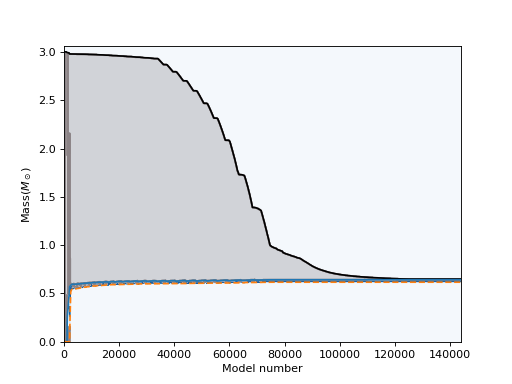

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [33]:
ifig=107;close(ifig);figure(ifig)
star_age.kip_cont(ifig=ifig)#, modstart=2100, modstop=2600)

#### Abundance profile at the time of formation of the partial-mix zone

In [9]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

In [10]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

<IPython.core.display.Javascript object>

NameError: name 'pt' is not defined

In [ ]:
ifig=122;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47222, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Isotopic abundance distribution in the C13 pocket

#### Static plots



In [ ]:
# help
#pt.iso_abund?

In [ ]:
ifig=123;close(ifig);figure(ifig)
pt.iso_abund(47221, stable=True,amass_range=[50,210], mass_range=[0.60312,0.6032], ylim=[-9, -2])


### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [ ]:
# pt.abu_chart?

In [ ]:
#ifig=1233;close(ifig);figure(ifig)
pt.abu_chart(47220,mass_range=[0.60312,0.6032], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)


You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [ ]:
pt.abund_at_masscoordinate(26100,0.57685,online=True)

In [ ]:
pt.get?

In [ ]:
a = pt.get([4722],'mass')
b = pt.get([4722],'radius')

In [ ]:
figure()
plot(b[0],a[0])